Minor Project: Sales Data Dashboard

In [2]:
#Objective: Create an interactive dashboard to visualize and analyze sales data over time.

#1. Data Cleaning and Preparation (Python & Pandas)


In [5]:
import pandas as pd
import numpy as np 

In [7]:
#load the dataset
df=pd.read_csv("C:\\Users\\Janhavi\\Downloads\\Sample - Superstore.csv",encoding="ISO-8859-1")


In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# Convert dates to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [13]:
# Drop unnecessary columns
df.drop(['Row ID', 'Postal Code'], axis=1, inplace=True)


In [15]:
# Add additional features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Order_Month'] = df['Order Date'].dt.to_period('M')

In [17]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Order_Month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,2016-11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,2016-11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2016,June,2016-06


In [19]:
# Check for missing values
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
Order_Month      0
dtype: int64


 2. Data Visualization (Seaborn + Plotly)


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

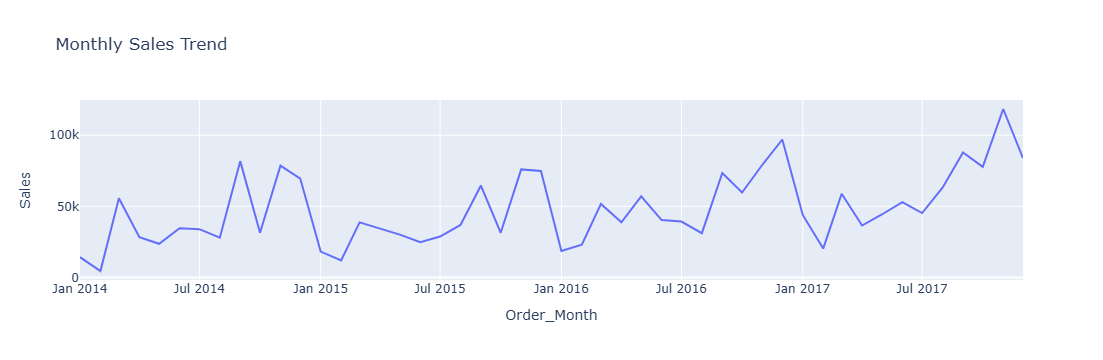

In [24]:
# 1. Sales Trend Over Time
monthly_sales = df.groupby('Order_Month')['Sales'].sum().reset_index()
monthly_sales['Order_Month'] = monthly_sales['Order_Month'].astype(str)

fig1 = px.line(monthly_sales, x='Order_Month', y='Sales', title='Monthly Sales Trend')
fig1.show()

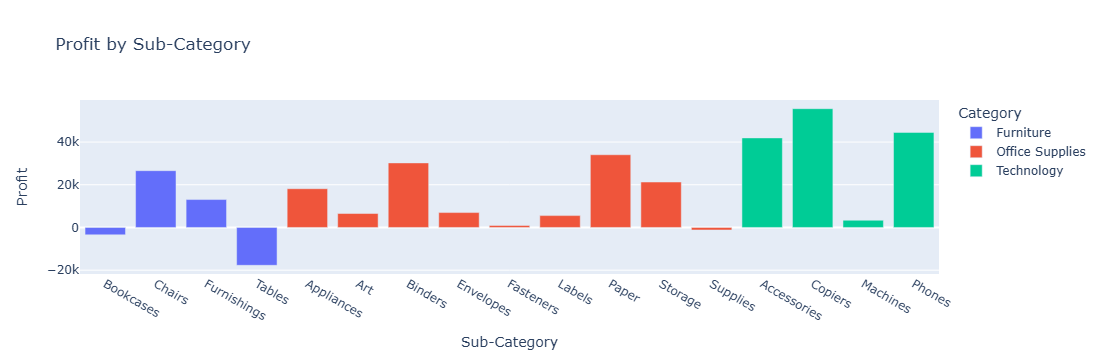

In [27]:
# 2. Profit by Category and Sub-Category
fig2 = px.bar(df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index(),
              x='Sub-Category', y='Profit', color='Category',
              title='Profit by Sub-Category')
fig2.show()


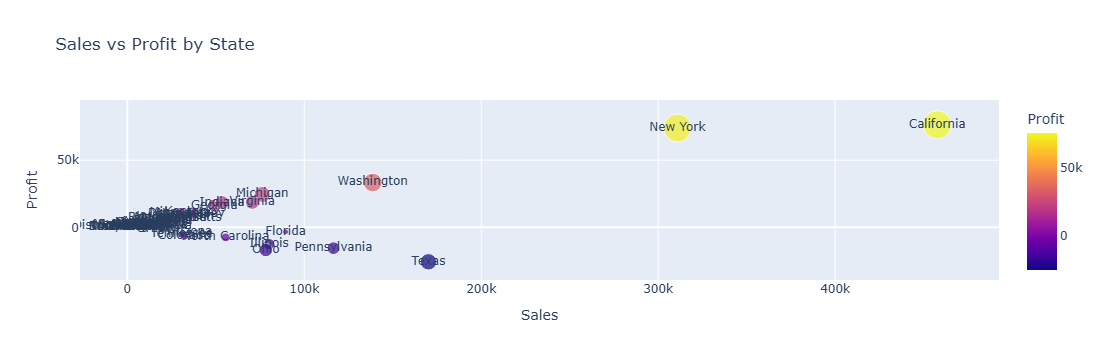

In [36]:
# 3. Bubble Chart: Sales vs Profit by State
bubble_data = df.groupby('State')[['Sales', 'Profit']].sum().reset_index()
bubble_data['Size'] = np.abs(bubble_data['Profit'])

fig3 = px.scatter(bubble_data, x='Sales', y='Profit', size='Size', text='State',
                  title='Sales vs Profit by State', color='Profit')
fig3.show()

3. SQL Queries (Using pandasql)

In [43]:
!pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26801 sha256=7e12375d25c24d680c2ad0c264aa8645b1576e422d65f6f0396caf7faab30caf
  Stored in directory: c:\users\janhavi\appdata\local\pip\cache\wheels\15\a1\e7\6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [49]:
import pandasql
from pandasql import sqldf

In [51]:
# Convert dates and fix column
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order_Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Setup SQL runner
pysqldf = lambda q: sqldf(q, globals())

# Run a SQL query
query = """
SELECT Order_Month, SUM(Sales) as Total_Sales
FROM df
GROUP BY Order_Month
ORDER BY Order_Month;
"""
monthly_sales = pysqldf(query)
print(monthly_sales)


   Order_Month  Total_Sales
0      2014-01   14236.8950
1      2014-02    4519.8920
2      2014-03   55691.0090
3      2014-04   28295.3450
4      2014-05   23648.2870
5      2014-06   34595.1276
6      2014-07   33946.3930
7      2014-08   27909.4685
8      2014-09   81777.3508
9      2014-10   31453.3930
10     2014-11   78628.7167
11     2014-12   69545.6205
12     2015-01   18174.0756
13     2015-02   11951.4110
14     2015-03   38726.2520
15     2015-04   34195.2085
16     2015-05   30131.6865
17     2015-06   24797.2920
18     2015-07   28765.3250
19     2015-08   36898.3322
20     2015-09   64595.9180
21     2015-10   31404.9235
22     2015-11   75972.5635
23     2015-12   74919.5212
24     2016-01   18542.4910
25     2016-02   22978.8150
26     2016-03   51715.8750
27     2016-04   38750.0390
28     2016-05   56987.7280
29     2016-06   40344.5340
30     2016-07   39261.9630
31     2016-08   31115.3743
32     2016-09   73410.0249
33     2016-10   59687.7450
34     2016-11   794

In [53]:
# Total Sales by Region
query1 = """
SELECT Region, SUM(Sales) AS Total_Sales
FROM df
GROUP BY Region
ORDER BY Total_Sales DESC;
"""

region_sales = pysqldf(query1)
print(region_sales)

    Region  Total_Sales
0     West  725457.8245
1     East  678781.2400
2  Central  501239.8908
3    South  391721.9050


4. Statistical Analysis (Descriptive Metrics)

In [56]:
# Descriptive stats for Sales & Profit
print(df[['Sales', 'Profit']].describe())

              Sales       Profit
count   9994.000000  9994.000000
mean     229.858001    28.656896
std      623.245101   234.260108
min        0.444000 -6599.978000
25%       17.280000     1.728750
50%       54.490000     8.666500
75%      209.940000    29.364000
max    22638.480000  8399.976000


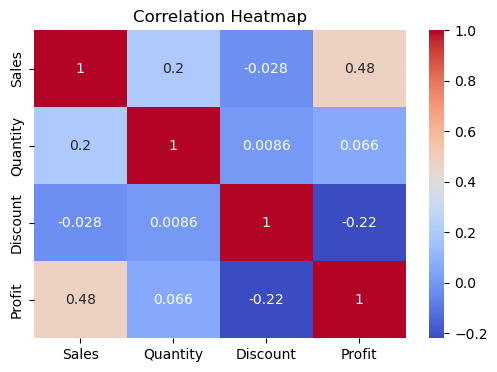

In [58]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()